# Jupyter Notebook - Music Demos

This build incorporates a range of Python packages that can be used to support the creation of rich, interactive materials relating to music.

For example, we can create (and retrieve) muscial scores that can be rendered within the notebook, as well as audio music files from the scores.

From the *Cell* menu, select *Run All* to render the generated cell outputs.

Toggle the *Hide cell inputs* toolbar button a couple of times to reveal all the cells.

##  The Linux `lilypond` Package

Python packages such as `abjad` and `music21` both wrap Lilypond to generate music scores from a higher level representation, but we can also write musical scores using Lilypond directly.

In [82]:
import os
from IPython.display import Image

def lp(score):
    score='''\version "2.18.2"
    \header {{ 
    tagline = ""  % removed 
    }} {}'''.format(score)
    with open("test.ly", "w") as out_file:
        out_file.write(score)
    os.system( "lilypond -dbackend=eps -dno-gs-load-fonts -dinclude-eps-fonts --png test.ly" )
    return Image(filename='test.png')

In [83]:
score=r"""
\relative c'' { 
\time 7/4 \
c2 bes4 a2 g a bes4 a( g) f2 
} 
\addlyrics { 
Join us now and share the soft -- ware! 
}
"""

For example, we can take the *lilypond* script:

`{{print(score)}}`

and render it as the following:

{{lp(score)}}

*Double click on this cell to see how its created. The actual `score` variable is defined in the hidden code cell immediately above this markdown cell.*

Several useful hints regarding layout can be found here: http://lilypond.org/doc/v2.19/Documentation/snippets/paper-and-layout.

For example, we can draw full width empty staves (though I can't see how to do just one?).

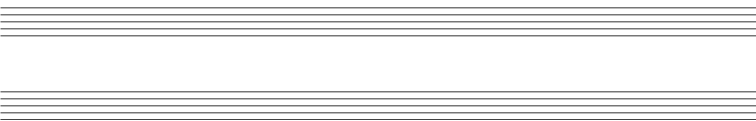

In [3]:
empty=r'''
#(set-global-staff-size 20)

\score {
  {
    \repeat unfold 2 { s1 \break }
  }
  \layout {
    indent = 0\in
    \context {
      \Staff
      \remove "Time_signature_engraver"
      \remove "Clef_engraver"
      \remove "Bar_engraver"
    }
    \context {
      \Score
      \remove "Bar_number_engraver"
    }
  }
}

'''

lp(empty)

## `music21`

The `music21` package is a [toolkit for musicology](http://web.mit.edu/music21/).

The toolkit can be used to display notation defined in a variety of ways.

In [4]:
#The setting of environment variables and the display of notation is borked on Linux
#Use crappy workarounds for now - or perhaps try a conda install?
from music21 import *


environment.UserSettings()['lilypondPath']='/usr/bin/lilypond'
environment.set('pdfPath', '/usr/bin/musescore')
environment.set('graphicsPath', '/usr/bin/musescore')
environment.set("musescoreDirectPNGPath", "/usr/bin/musescore")
environment.set("musicxmlPath", "/usr/bin/musescore")

%load_ext music21.ipython21

from IPython.display import Image

def render(s):
    s.show('lily.png')
    return Image(filename=str(s.write('lily.png')))

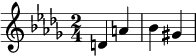

In [5]:
m1 = stream.Measure()
m1.timeSignature = meter.TimeSignature('2/4')
m1.keySignature = key.KeySignature(-5)
m1.append([note.Note('D'), note.Note('A')])
m2 = stream.Measure()
m2.append([note.Note('B-'), note.Note('G#')])
p = stream.Part()
p.append([m1, m2])
render(p)

### TinyNotation

In [6]:
def tiny(t):
    return render( converter.parse('tinyNotation: {}'.format(t)) )

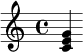

In [21]:
c = chord.Chord("C4 E4 G4")
c.isConsonant()
render(c)

We can also provide an audio rendering of the score.

In [8]:
c.show('midi')

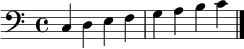

In [9]:
from music21 import converter
s = converter.parse('tinyNotation: 4/4 C4 D4 E4 F4 G4 A4 B4 c4')
render(s)

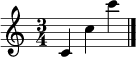

In [81]:
tiny("3/4 c4 c'4 c''4")

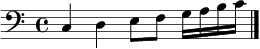

In [11]:
tiny('4/4 C4 D E8 F G16 A B c')

We can use an interactive widget to render a musical score based on a *TinyText* input.

For example, start to type yourr own score, such as *4/4 C D E F* in the text box below.

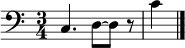

In [12]:
tiny('3/4 C.4 D8~ D8 r c4')

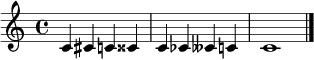

In [13]:
tiny('4/4 c4 c# c c## cn c- c-- c c1')

In [80]:
from ipywidgets import interact

@interact(string="")
def tiny_w(string):
    return tiny(string)



### Render a Well-Known Score

The `music21` package provides access to a wide range of scores.

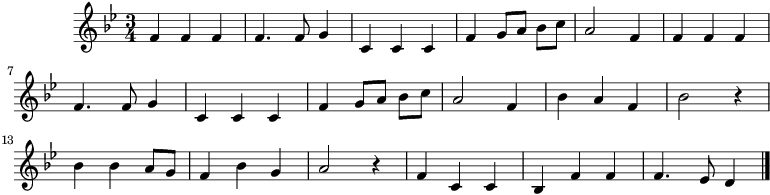

In [14]:
myBach = corpus.parse('bach/bwv57.8')
alto = myBach.parts['Alto']

render(alto)

Once again, we can listen to the score by converting it to a MIDI file and then playing that file through an audio player.

In [15]:
alto.show('midi')

We can also save the score as a MIDI file:

In [16]:
alto.write('midi', fp='alto.mid');

And then try to load it back in and render it again:

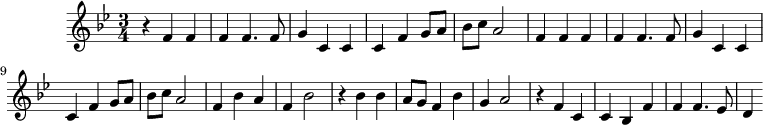

In [17]:
s=converter.parse('alto.mid')
render(s)

## Convert MIDI File to WAV File

In [46]:
import os
from IPython.display import Audio

def midi2wav(midi_fn):
    os.system( 'timidity "{}" -Ow > /dev/null '.format(midi_fn) )
    return Audio('{}'.format(midi_fn.replace('.mid','.wav')))

midi2wav(c.write('midi', fp='c.mid'))

## Viewing the WAV File Waveform

I'm not sure how could the audio converters are...

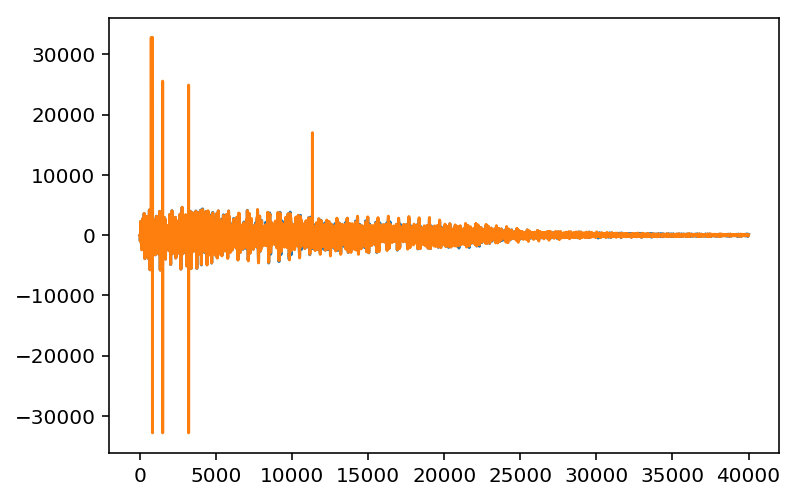

In [49]:
from scipy.io import wavfile
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

samplerate,data=wavfile.read('c.wav')
times=np.arange(len(data)/float(samplerate))
plt.plot(data[:40000]);

## Fourier Analysis


We can also do a Fourier analysis of one the channels in the presumably stereo `.wav` file.

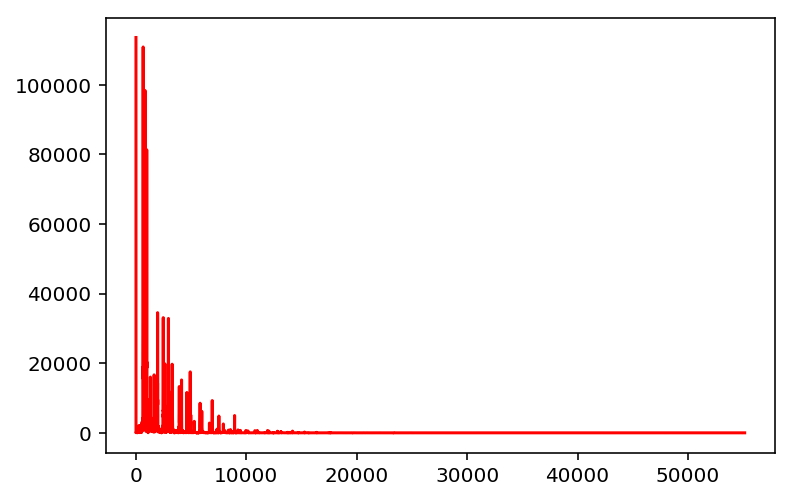

In [78]:
#https://stackoverflow.com/a/23378284/454773
import matplotlib.pyplot as plt
from scipy.io import wavfile # get the api
from scipy.fftpack import fft
from pylab import *

def fourier(filename):
    fs, data = wavfile.read(filename) # load the data
    a = data.T[0] # this is a two channel soundtrack, I get the first track
    b=[(ele/2**8.)*2-1 for ele in a] # this is 8-bit track, b is now normalized on [-1,1)
    c = fft(b) # create a list of complex number
    d = len(c)/2  # you only need half of the fft list
    k = arange(len(data))
    plt.plot(abs(c[:int(d-1)]),'r')
    #savefig(filename+'.png',bbox_inches='tight')

#What are the axes?
fourier('c.wav')